In [1]:
import sys, os

In [43]:
import numpy as np

In [2]:
sys.path.append("/home/anton/BigMac/skoltech/CRISPR_research/notebooks/")

In [3]:
import utils.plot_utils as pu
import utils.hierarcical_utils as hu
import utils.hamiltonian_utils as hamu

In [4]:
from importlib import reload
hu = reload(hu)
hamu = reload(hamu)
pu = reload(pu)

In [24]:
# pairs_path = "../../data/ES/ES3_R1_pairs.txt"
# lines_path = "../../data/ES/ES3_R1_spacers.txt"

# pairs_path = "../../data/ES_reload/ES/ES2_R1_pairs.txt"
# lines_path = "../../data/ES_reload/ES/ES2_R1_spacers.txt"

# pairs_path = "../data/ES/ES5_R1_pairs.txt"
# lines_path = "../data/ES/ES5_R1_spacers.txt"

# pairs_path = "../../data/SlO_10/SlO1_R1_pairs_10.txt"
# lines_path = "../../data/SlO_10/SlO1_R1_spacers_10.txt"

pairs_path = "../../data/clostr_06_07/good_1-3_R1_06_07pairsq10.txt"
#lines_path = "../../data/Sasha/Sasha1.fasta"

#pairs_path = "../data/Thermus/III/Vesuvius (1)_III_pairs.txt"
#lines_path = "../data/Thermus/III/Vesuvius (1).III.txt"

# with open(lines_path) as f:
#     lines = [x[:] for x in f.readlines()][1::] #CAREFULLLL

with open(pairs_path) as f:
    pairs = [[y[:] for y in x[:-2].split(' ') ] for x in f.readlines()]

lines = []
for p in pairs:
    lines.append(p[0])
    lines.append(p[1])
    
print(len(lines))

1298458


In [29]:
lines[:5]

['TAATCTGACACATACAAAGTTGAACCTAGTGGTACGG',
 'AAAAGCGTTCTTAAATCGTTACTTAACTCTTGCAAA',
 'TTAAAGGTGCAAGTCTTAGTACTTGTTACATGAGTT',
 'AACAAAGAACCATTTGAATCACGAAAACTAAAAAAC',
 'AATTTAGAAAAGGACTATTAGGAAGCAAAGAAAAAAT']

In [30]:
pairs[:2]

[['TAATCTGACACATACAAAGTTGAACCTAGTGGTACGG',
  'AAAAGCGTTCTTAAATCGTTACTTAACTCTTGCAAA'],
 ['TTAAAGGTGCAAGTCTTAGTACTTGTTACATGAGTT',
  'AACAAAGAACCATTTGAATCACGAAAACTAAAAAAC']]

In [31]:
od = hu.get_ordered_spacers(lines)

In [32]:
answ, sp_to_n, cl_to_n, n_to_cl = hu.squash(od, 6)

A Jupyter Widget

In [41]:
counter = 0
true_keys = set()
for item in answ.items():
    if item[1] > 1:
        counter += 1
        true_keys.add(item[0])

In [46]:
cl_to_n = dict(zip(list(true_keys), np.arange(len(true_keys))))

In [49]:
pairs_cl = hu.process_pairs(pairs, cl_to_n, 6)

A Jupyter Widget

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/home/anton/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/anton/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/anton/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [50]:
gr = hamu.pairs_to_gr(pairs_cl, len(cl_to_n))

In [51]:
np.save("./13", gr)

In [53]:
import pickle

In [54]:
pickle.dump(cl_to_n, open("./13_cl_to_n", 'wb'))
pickle.dump(answ, open("./13_nd", 'wb'))

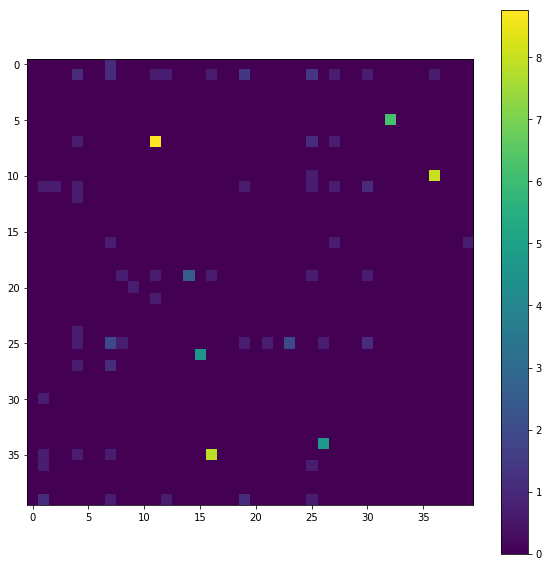

In [58]:
pu.plot_gr(gr[:40, :40], log =1)

In [59]:
arrays, weights = hamu.restore_arrays(gr)

In [60]:
weights

[[9525.0,
  6473.0,
  14240.0,
  6664.0,
  3075.0,
  1631.0,
  6450.0,
  5908.0,
  28595.0,
  11228.0,
  4811.0,
  3908.0,
  4357.0,
  15676.0,
  8721.0,
  3697.0],
 [16996.0,
  8923.0,
  6437.0,
  17285.0,
  6334.0,
  5767.0,
  9980.0,
  7881.0,
  9485.0,
  13099.0,
  14567.0,
  8048.0,
  9510.0,
  2444.0],
 [12051.0, 5593.0, 7841.0, 4714.0, 7276.0],
 [2654.0,
  5111.0,
  6158.0,
  5990.0,
  3789.0,
  10408.0,
  6557.0,
  6916.0,
  4572.0,
  1153.0,
  2245.0,
  214.0],
 [2066.0, 10142.0],
 [2493.0,
  4519.0,
  7590.0,
  8408.0,
  6564.0,
  6134.0,
  9700.0,
  6091.0,
  2579.0,
  3387.0],
 [2340.0,
  1290.0,
  1547.0,
  3121.0,
  1618.0,
  3509.0,
  2656.0,
  3272.0,
  2448.0,
  1423.0,
  3603.0,
  89.0,
  8901.0],
 [3791.0,
  4105.0,
  2758.0,
  3033.0,
  1942.0,
  1779.0,
  4004.0,
  915.0,
  6247.0,
  2449.0,
  4791.0,
  3150.0,
  4174.0,
  5200.0,
  779.0,
  634.0,
  1697.0,
  2432.0,
  4768.0,
  3752.0,
  4579.0,
  2835.0],
 [3796.0, 1322.0, 1711.0, 1782.0, 2360.0],
 [1767.0,
  10

In [64]:
mean_weights = [np.mean(x) for x in weights]

In [66]:
lens = [len(x) for x in arrays]

In [70]:
import matplotlib.pyplot as plt

<Container object of 18 artists>

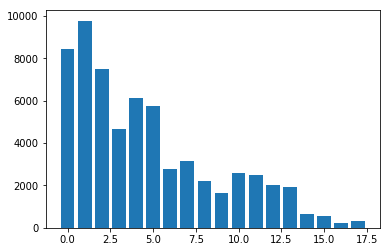

In [71]:
plt.bar(np.arange(18), mean_weights[:18])

In [67]:
lens

[17,
 15,
 6,
 13,
 3,
 11,
 14,
 23,
 6,
 13,
 8,
 5,
 10,
 4,
 14,
 4,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2]

In [19]:
for i in arrays[0][:5]:
    print(n_to_cl[i])

GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC
CTGTTTTCGCAAATCTATGGACTATTGCTAT
GGGCGCACGGAATACAAAGCCGTGTATCTGC
TGGCTCTGCAACAGCAGCACCCATGACCACG
GAAATGCTGGTGAGCGTTAATGCCGCAAACAC


In [20]:
for i in arrays[1][:5]:
    print(n_to_cl[i])

ACACGCCCTTATCAAATAGCTGTGATTTACCT
ATAGACCCCGAACAACAATACGCGCAAACCG
TACCGTACAGACTGCCGGATATTATTTTTTT
CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA
AACGTCAGGTTGTCGCCGCTCTGCGTGGTCGC


In [ ]:
for a,b in zip(arrays[1], arrays[1][1:]):
    

In [13]:
n_to_cl[0]

'GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC'

In [15]:
n_to_cl[20]

'ATAGACCCCGAACAACAATACGCGCAAACCG'

# Compare spacers

In [74]:
import editdistance as  ed

In [75]:
len(lines)

1298458

In [79]:
dists = [ed.eval(l, lines[453452]) for l in lines]

(array([2.42150e+04, 1.48700e+03, 2.01000e+02, 1.12000e+02, 1.30000e+01,
        1.20000e+01, 8.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 5.30000e+01, 3.37400e+03, 9.83440e+04, 9.30750e+04,
        1.90454e+05, 6.28248e+05, 1.53298e+05, 6.69790e+04, 3.85810e+04]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. ]),
 <a list of 20 Patch objects>)

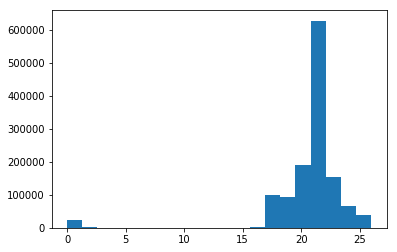

In [80]:
plt.hist(dists, bins = 20)

In [82]:
len(cl_to_n)

289